In [369]:
import numpy as np
import pandas as pd

# Step 1: Reading and Understanding the Data

In [370]:
#read the csv file
df = pd.read_csv('D:/pro1/pro/day.csv')

In [371]:
#read the first 5 rows 
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [372]:
#check the datatype and columns name 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [373]:
#find the null value present in data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [374]:
#rename the column name
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [375]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Step 2: Visualising the Data

In [376]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [377]:
import matplotlib.pyplot as plt 
import seaborn as sns

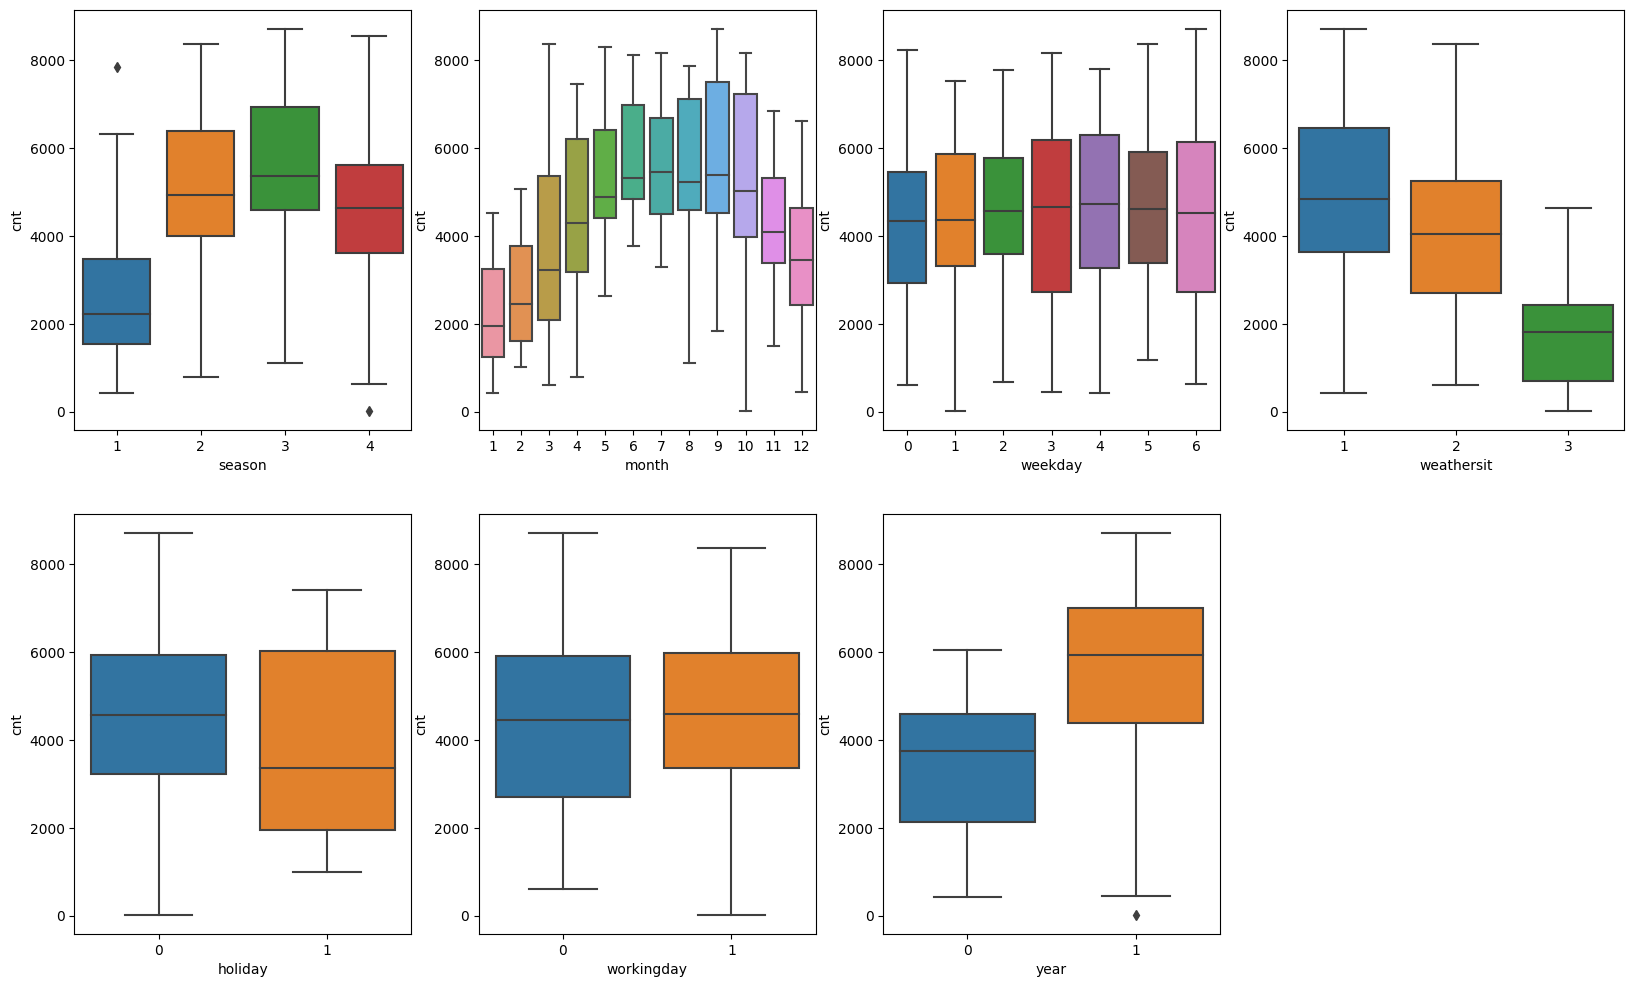

In [378]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [379]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=df[column],y=df['cnt'])
    plt.subplot(1,2,2)
    sns.barplot(x=df[column],y=df['cnt'],hue='year',data=df)
    plt.legend(labels=['0', '1'])
    plt.show()

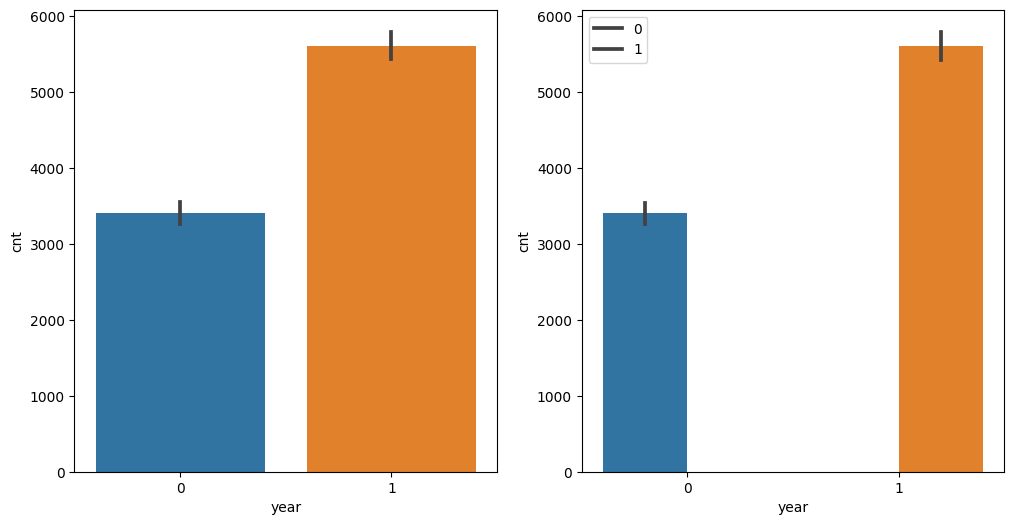

In [380]:
# plotting visualization for year column

plot_cat_columns('year')

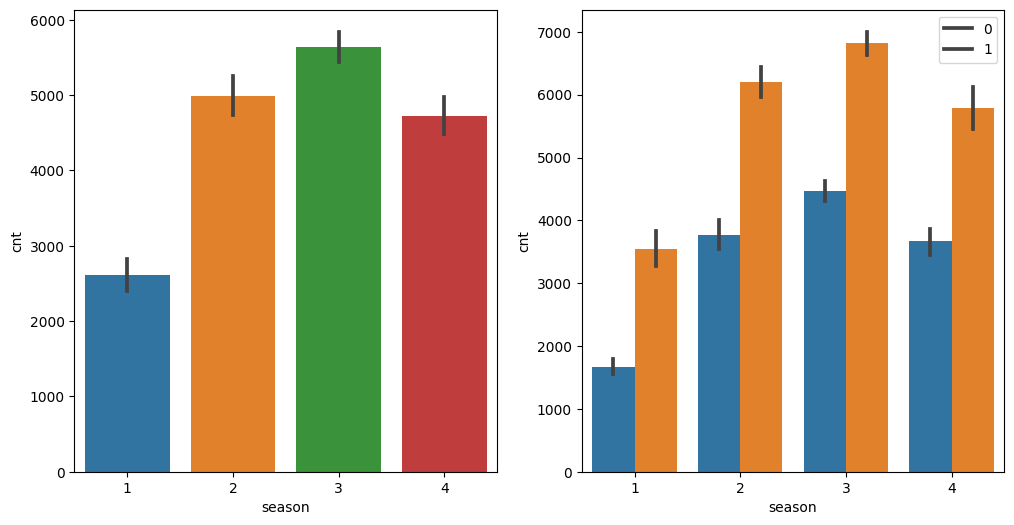

In [381]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019

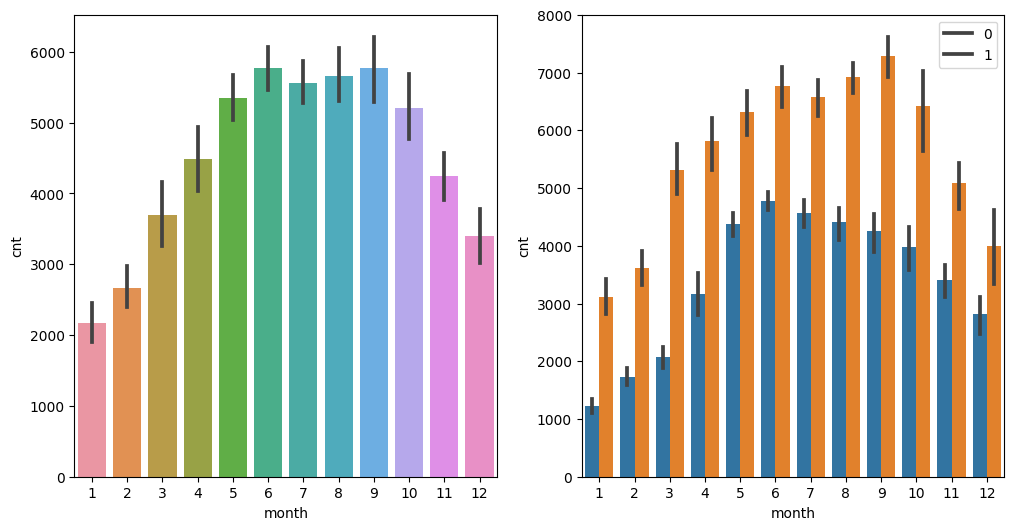

In [382]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019

In [ ]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

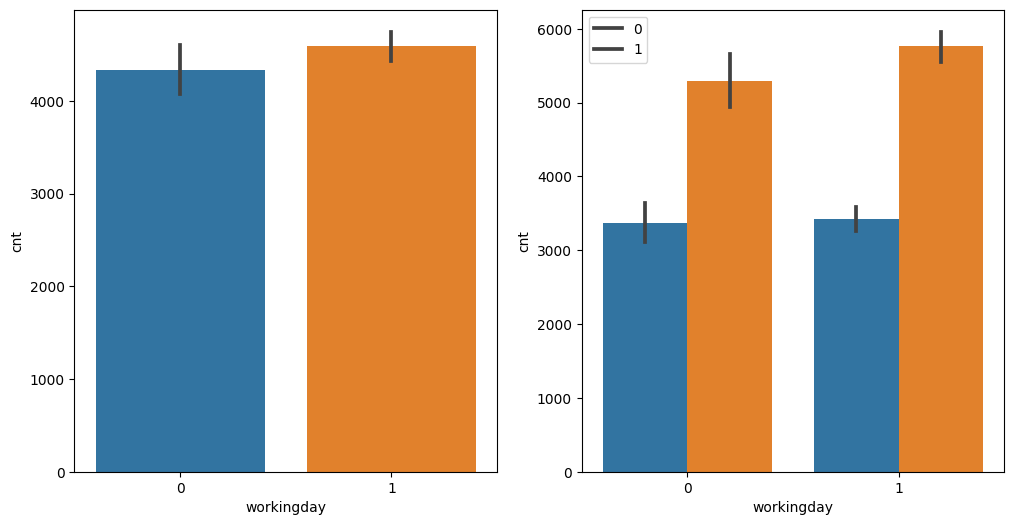

In [384]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

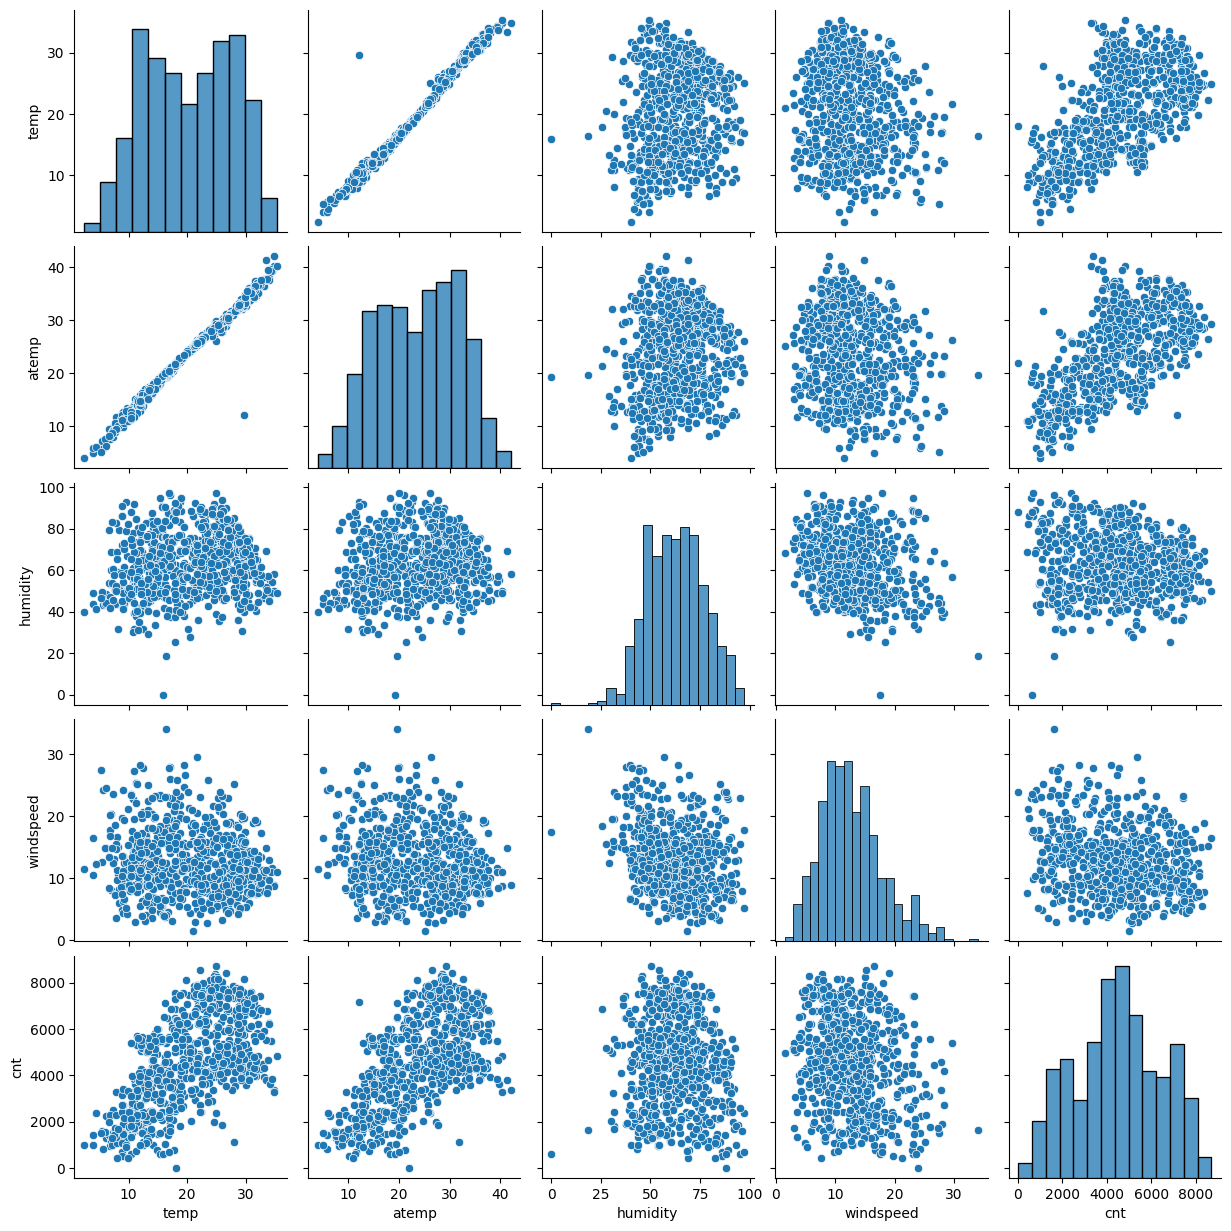

In [385]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

# Step 3: Data Preparation

In [386]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the weekday column
 
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [387]:
df.head()

instant      dteday  season  year month  holiday weekday  workingday  \
0        1  01-01-2018  spring     0   jan        0     sat           0   
1        2  02-01-2018  spring     0   jan        0     sun           0   
2        3  03-01-2018  spring     0   jan        0     mon           1   
3        4  04-01-2018  spring     0   jan        0     tue           1   
4        5  05-01-2018  spring     0   jan        0     wed           1   

  weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0      Misty  14.110847  18.18125   80.5833  10.749882     331         654   
1      Misty  14.902598  17.68695   69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025   43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610   59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [388]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True,dtype=np.uint8)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=np.uint8)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=np.uint8)
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=np.uint8)

In [389]:
weekdays_df.head()

mon  sat  sun  thu  tue  wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1

In [390]:
df_new2 = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [391]:
df_new2.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [392]:
#dropping unnecessary columns as we have already created dummy variable out of it.
df_new2.drop(['instant','dteday','casual', 'registered','month','weekday','weathersit','season'],axis = 1, inplace = True)

In [393]:
df_new2.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
0    0    0  ...    1    0    0    0    0               0      1       1   
1    0    0  ...    0    1    0    0    0               0      1       1   
2    0    0  ...    0    0    0    0    0               0      0       1   
3    0    0  ...    0    0    0    1    0               0      0       1   
4    0    0  ...    0    0    0    0    1               0      0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 30 columns]

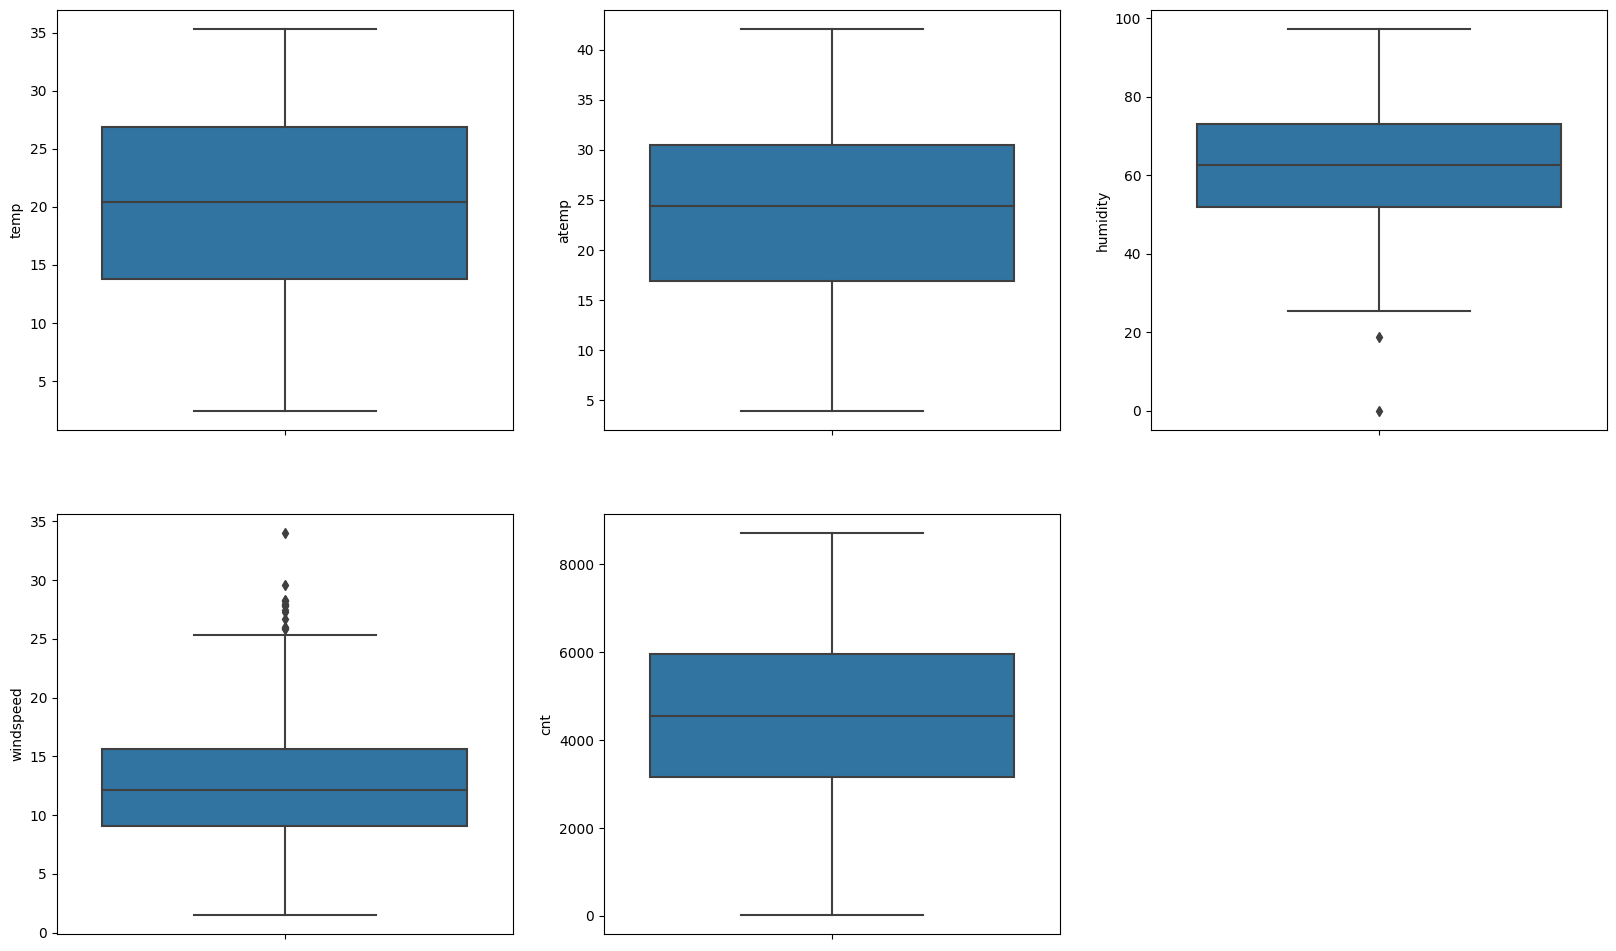

In [394]:
#check the outlier present in the dataset or not
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y='temp',data=df_new2)
plt.subplot(2,3,2)
sns.boxplot(y='atemp',data=df_new2)
plt.subplot(2,3,3)
sns.boxplot(y='humidity',data=df_new2)
plt.subplot(2,3,4)
sns.boxplot(y='windspeed',data=df_new2)
plt.subplot(2,3,5)
sns.boxplot(y='cnt',data=df_new2)
plt.show()

windspeed and humidity are present some outlier

In [395]:
#remove all outlier present
def remove_outliers(df_new2, columns):
    for column in columns:
        Q1 = df_new2[column].quantile(0.25)
        Q3 = df_new2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new2 = df_new2[(df_new2[column] >= lower_bound) & (df_new2[column] <= upper_bound)]
    return df_new2
columns_to_remove_outliers = ['temp','atemp', 'humidity','windspeed','cnt']
df_new2 = remove_outliers(df_new2, columns_to_remove_outliers)

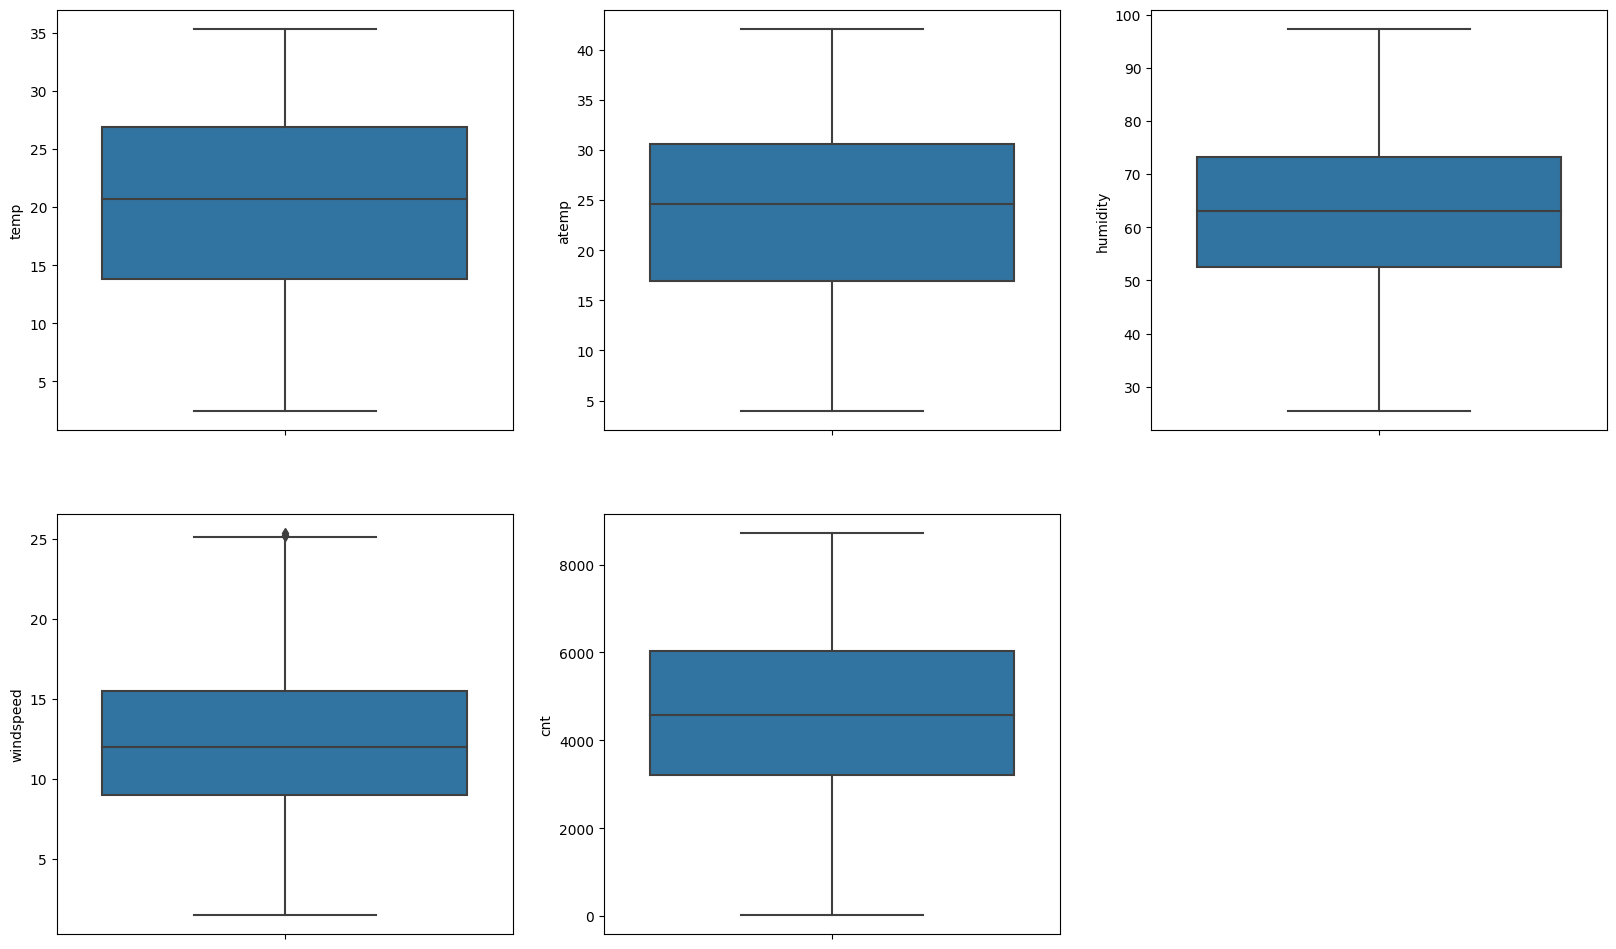

In [396]:
#check the outlier present in the dataset or not
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y='temp',data=df_new2)
plt.subplot(2,3,2)
sns.boxplot(y='atemp',data=df_new2)
plt.subplot(2,3,3)
sns.boxplot(y='humidity',data=df_new2)
plt.subplot(2,3,4)
sns.boxplot(y='windspeed',data=df_new2)
plt.subplot(2,3,5)
sns.boxplot(y='cnt',data=df_new2)
plt.show()

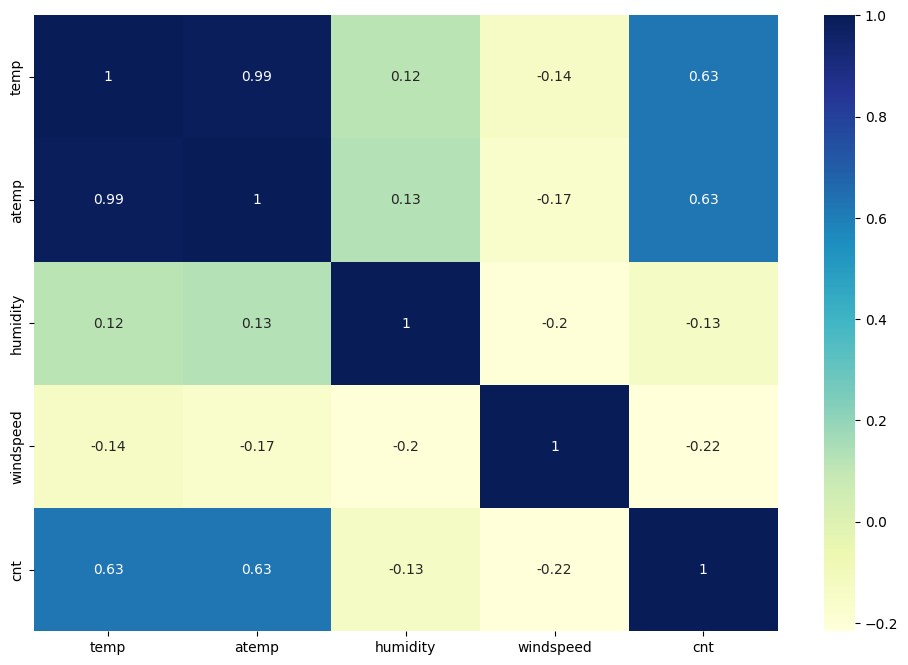

In [397]:
#plot the heatmap to fine the correlation between independent variables
plt.figure(figsize = (12, 8))
data=df_new2[['temp','atemp', 'humidity','windspeed','cnt']]
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 4: Splitting the Data into Training and Testing Sets

In [398]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_new2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [399]:
df_train.shape

(572, 30)

In [400]:
df_test.shape

(144, 30)

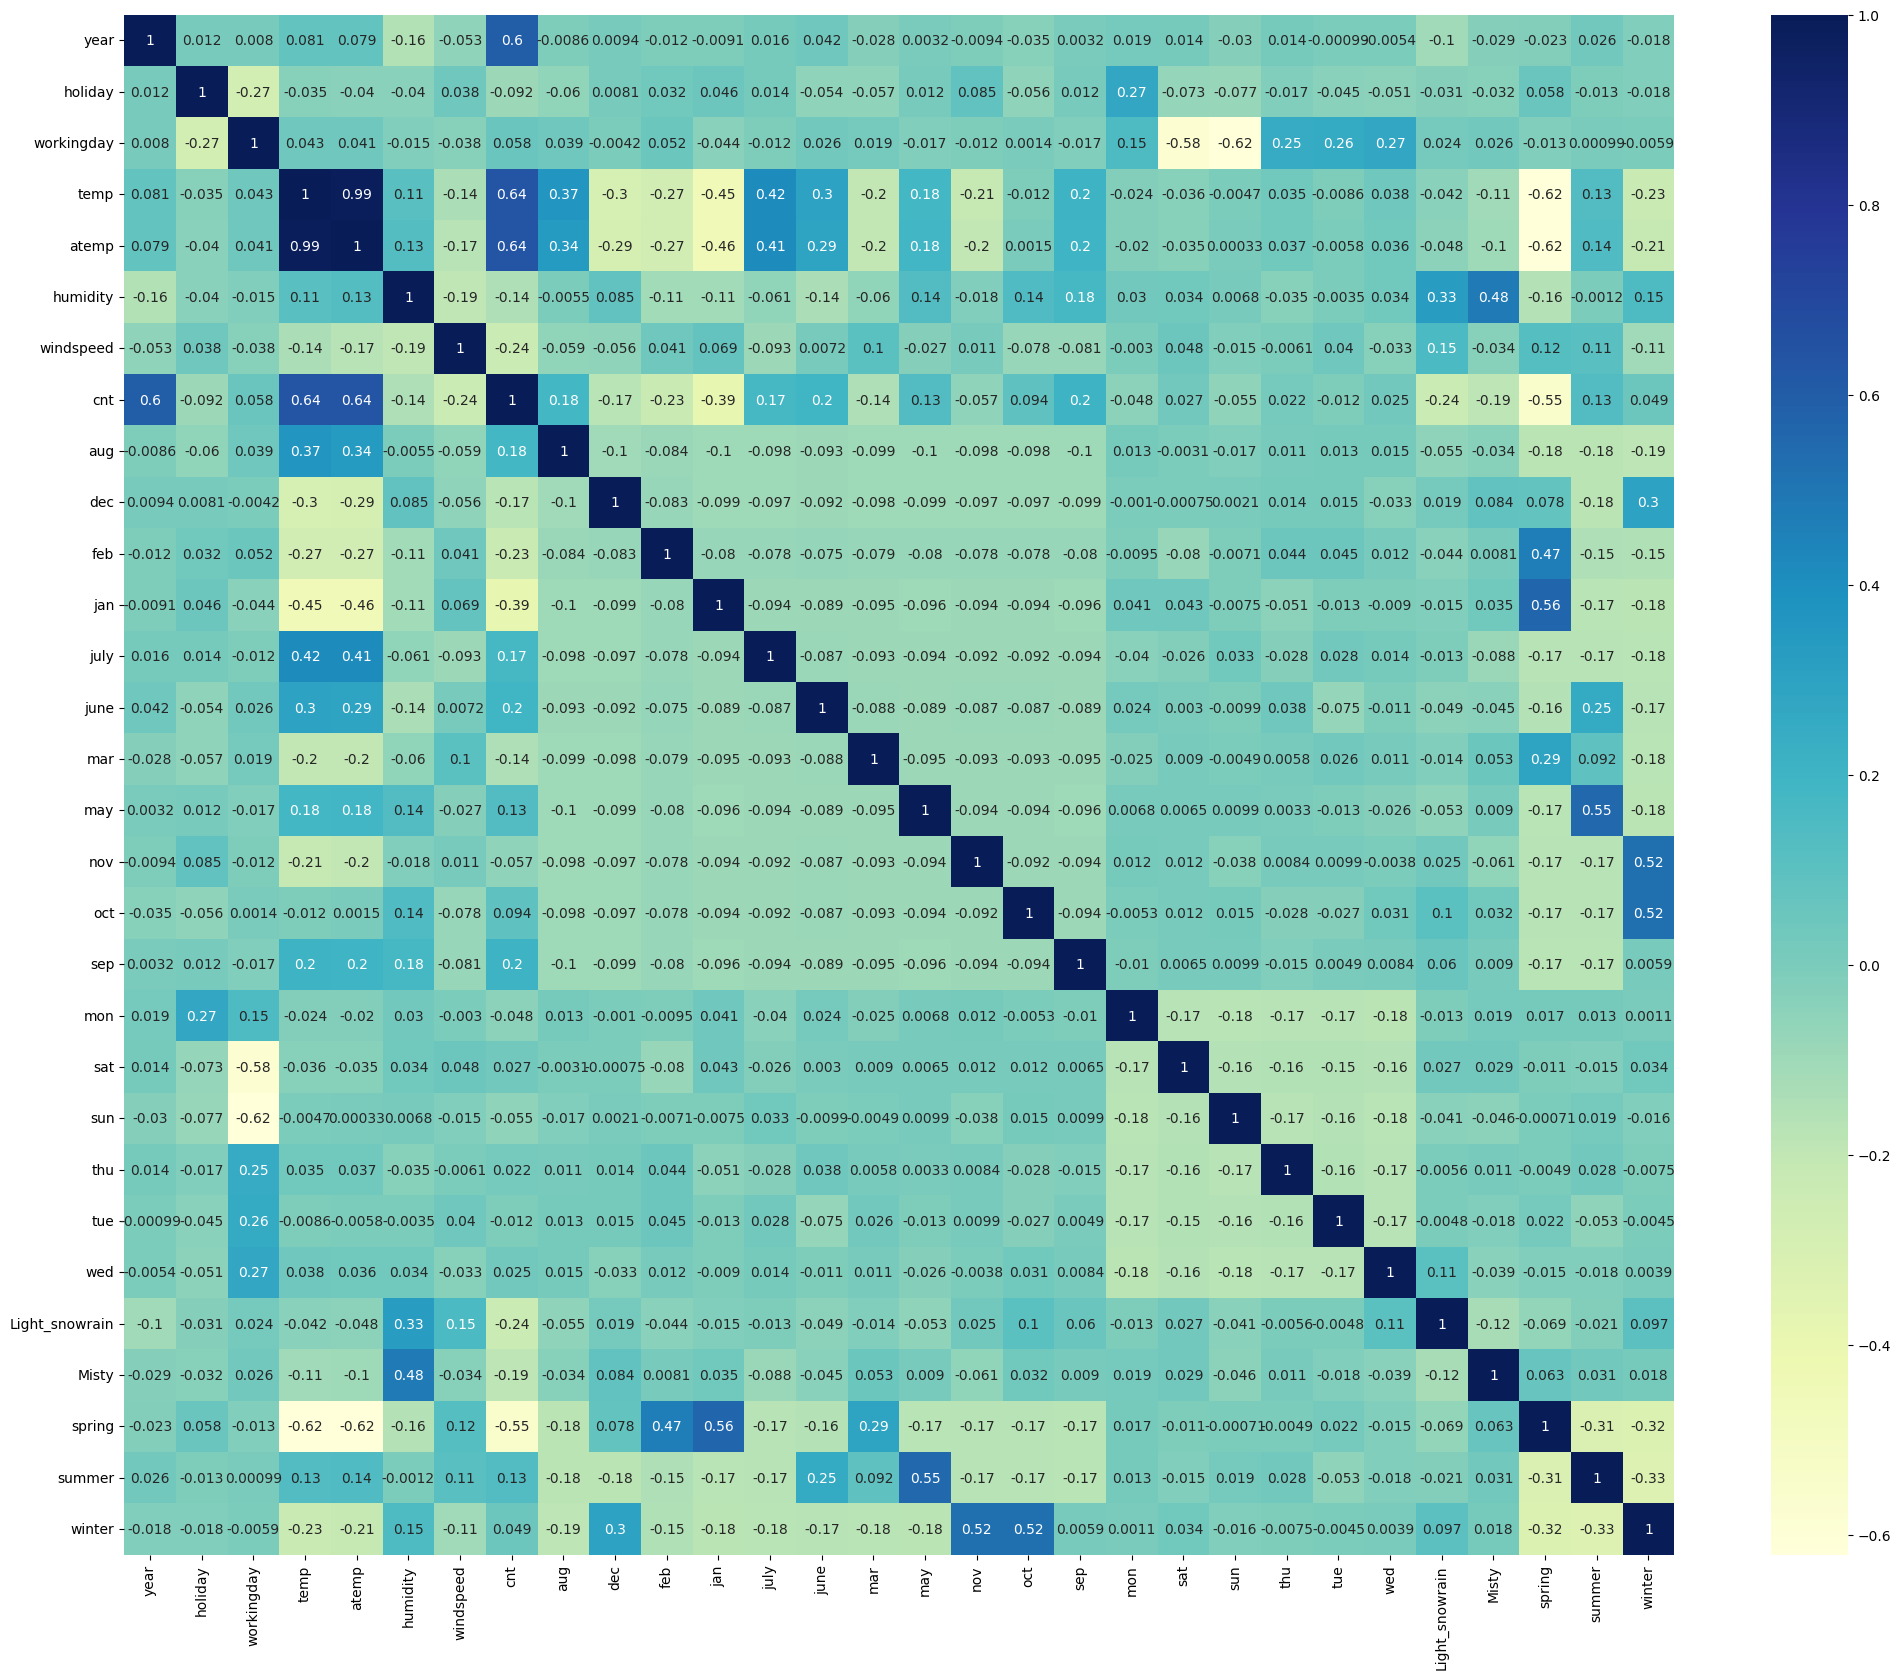

In [401]:
#plot the heatmap to fine the correlation between all independent variables
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [402]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [403]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp', 'humidity','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
227     0        0           1  0.799593  0.758419  0.423759   0.601427   
376     1        0           1  0.402934  0.405283  0.753827   0.445791   
31      0        0           1  0.165779  0.208029  0.792992   0.086646   
290     0        0           1  0.589842  0.593671  0.605022   0.246532   
486     1        0           1  0.629300  0.613978  0.745253   0.325164   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
227  0.541072    1    0  ...    0    0    0    1    0               0      0   
376  0.468822    0    0  ...    0    0    1    0    0               0      1   
31   0.153935    0    0  ...    0    0    0    1    0               0      1   
290  0.543718    0    0  ...    0    0    0    1    0               0      1   
486  0.707202    0    0  ...    0    0    0    0    1               0      0   

     spring  summer  winter  
227       0       0       0  
376       1       0       0  
31        1       0       0  
290       0       0       1  
486       0       1       0  

[5 rows x 30 columns]

In [404]:
# describing the dataset

df_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  572.000000  572.000000  572.000000  572.000000  572.000000  572.000000   
mean     0.494755    0.033217    0.685315    0.546963    0.531669    0.504980   
std      0.500410    0.179359    0.464797    0.228587    0.217563    0.204063   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.344526    0.344828    0.351307   
50%      0.000000    0.000000    1.000000    0.558172    0.553967    0.503368   
75%      1.000000    0.000000    1.000000    0.747935    0.713863    0.653398   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  572.000000  572.000000  572.000000  572.000000  ...  572.000000   
mean     0.461390    0.519465    0.094406    0.092657  ...    0.132867   
std      0.203636    0.225047    0.292648    0.290205  ...    0.339728   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.316436    0.358491    0.000000    0.000000  ...    0.000000   
50%      0.437937    0.524620    0.000000    0.000000  ...    0.000000   
75%      0.585673    0.692533    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  572.000000  572.000000  572.000000  572.000000      572.000000   
mean     0.148601    0.136364    0.134615    0.150350        0.027972   
std      0.356006    0.343475    0.341611    0.357727        0.165037   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  572.000000  572.000000  572.000000  572.000000  
mean     0.346154    0.236014    0.239510    0.251748  
std      0.476159    0.425003    0.427158    0.434397  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [405]:
#split the  target variable into ytrain
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a linear model

In [406]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.params)
print(lr.summary())

const             0.242313
year              0.232956
holiday           0.014992
workingday        0.090451
temp              0.323590
atemp             0.108234
humidity         -0.127112
windspeed        -0.120213
aug               0.002069
dec              -0.068015
feb              -0.032197
jan              -0.064681
july             -0.031858
june             -0.002433
mar               0.009218
may               0.023530
nov              -0.074961
oct              -0.000310
sep               0.070801
mon              -0.030772
sat               0.094580
sun               0.042290
thu              -0.022455
tue              -0.018503
wed              -0.009169
Light_snowrain   -0.218554
Misty            -0.046248
spring           -0.073291
summer            0.019367
winter            0.103274
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:           

There are so many insignificant features present

In [407]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [408]:
#calculate VIF of variables to find the multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features    VIF
0             year   1.08
6        windspeed   1.27
24  Light_snowrain   1.49
21             thu   1.71
25           Misty   1.72
22             tue   1.72
23             wed   1.78
18             mon   1.86
5         humidity   2.32
14             may   2.40
12            june   3.07
13             mar   3.33
9              feb   4.37
17             sep   5.13
1          holiday   5.29
10             jan   5.96
8              dec   6.02
11            july   6.04
16             oct   6.18
7              aug   6.35
15             nov   6.44
27          summer   7.72
28          winter   8.20
26          spring   9.90
19             sat  15.92
20             sun  18.05
4            atemp  61.72
3             temp  72.00
2       workingday  82.38

In [409]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [410]:
# Recursive feature elimination 

lm = LinearRegression()
estimator=lm
num_features_to_select=15
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)    
rfe = rfe.fit(X_train, y_train)# running RFE
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 10),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 15),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', False, 4),
 ('sun', False, 7),
 ('thu', False, 12),
 ('tue', False, 9),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1)]

In [411]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'dec',
       'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [412]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [413]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [414]:
#train the model again after select the feature
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.00e-219
Time:                        15:23:53   Log-Likelihood:                 588.94
No. Observations:                 572   AIC:                            -1146.
Df Residuals:                     556   BIC:                            -1076.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3361      0.026     13.

we seem that after ref there are also some insignificant feature present

In [415]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features     VIF
1          holiday    1.06
10             sep    1.24
8             july    1.43
11  Light_snowrain    1.45
6              dec    1.56
7              jan    1.70
9              nov    1.80
0             year    2.04
12           Misty    2.50
13          spring    2.63
14          winter    2.69
5        windspeed    5.33
4         humidity   13.00
2             temp  394.97
3            atemp  396.90

In [416]:
#remove the column 'atemp'
X_train_rfe.drop(['atemp'],axis = 1, inplace = True)


In [418]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     229.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.86e-220
Time:                        15:27:32   Log-Likelihood:                 588.57
No. Observations:                 572   AIC:                            -1147.
Df Residuals:                     557   BIC:                            -1082.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3389      0.026     13.

In [419]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features    VIF
1          holiday   1.06
9              sep   1.24
7             july   1.43
10  Light_snowrain   1.44
5              dec   1.56
6              jan   1.70
8              nov   1.80
0             year   2.04
11           Misty   2.49
12          spring   2.61
13          winter   2.65
4        windspeed   5.25
2             temp  11.86
3         humidity  12.64

In [420]:
#remove the column 'humidity'
X_train_rfe.drop(['humidity'],axis = 1, inplace = True)

In [422]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.52e-217
Time:                        15:33:21   Log-Likelihood:                 577.95
No. Observations:                 572   AIC:                            -1128.
Df Residuals:                     558   BIC:                            -1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2949      0.024     12.

In [423]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features   VIF
1          holiday  1.06
9   Light_snowrain  1.11
8              sep  1.23
6             july  1.39
4              dec  1.51
10           Misty  1.54
5              jan  1.69
7              nov  1.78
0             year  2.01
11          spring  2.35
12          winter  2.47
3        windspeed  5.21
2             temp  5.65

In [424]:
#remove the column 'july'
X_train_rfe.drop(['july'],axis = 1, inplace = True)

In [425]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.05e-217
Time:                        15:35:48   Log-Likelihood:                 574.71
No. Observations:                 572   AIC:                            -1123.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3050      0.024     12.

In [426]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features   VIF
1          holiday  1.06
8   Light_snowrain  1.11
7              sep  1.18
4              dec  1.51
9            Misty  1.53
5              jan  1.68
6              nov  1.78
0             year  2.00
10          spring  2.34
11          winter  2.42
2             temp  4.59
3        windspeed  5.07

In [427]:
#remove the column 'nov'
X_train_rfe.drop(['nov'],axis = 1, inplace = True)

In [428]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     265.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.44e-214
Time:                        15:38:43   Log-Likelihood:                 564.21
No. Observations:                 572   AIC:                            -1104.
Df Residuals:                     560   BIC:                            -1052.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2827      0.024     11.

In [429]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

Features   VIF
1          holiday  1.04
7   Light_snowrain  1.11
6              sep  1.16
4              dec  1.33
8            Misty  1.53
10          winter  1.57
5              jan  1.67
0             year  2.00
9           spring  2.34
2             temp  4.51
3        windspeed  4.97

##  We can cosider the above model, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

In [430]:
# Checking the parameters and their coefficient values
lr.params

const             0.282748
year              0.240111
holiday          -0.095698
temp              0.385542
windspeed        -0.094636
dec              -0.049804
jan              -0.049851
sep               0.064453
Light_snowrain   -0.277532
Misty            -0.068522
spring           -0.105840
winter            0.054367
dtype: float64

In [431]:
X_train_lm

const  year  holiday      temp  windspeed  dec  jan  sep  Light_snowrain  \
227    1.0     0        0  0.799593   0.601427    0    0    0               0   
376    1.0     1        0  0.402934   0.445791    0    1    0               0   
31     1.0     0        0  0.165779   0.086646    0    0    0               0   
290    1.0     0        0  0.589842   0.246532    0    0    0               0   
486    1.0     1        0  0.629300   0.325164    0    0    0               0   
..     ...   ...      ...       ...        ...  ...  ...  ...             ...   
590    1.0     1        0  0.831783   0.412594    0    0    0               0   
55     1.0     0        0  0.380316   0.911252    0    0    0               0   
356    1.0     0        0  0.391512   0.708020    1    0    0               0   
82     1.0     0        0  0.281445   0.622393    0    0    0               0   
532    1.0     1        0  0.664605   0.344410    0    0    0               0   

     Misty  spring  winter  
227      0       0       0  
376      1       1       0  
31       1       1       0  
290      1       0       1  
486      0       0       0  
..     ...     ...     ...  
590      0       0       0  
55       1       1       0  
356      0       1       0  
82       1       0       0  
532      0       0       0  

[572 rows x 12 columns]

In [432]:
y_train_pred = lr.predict(X_train_lm)

# Step 6: Residual Analysis of the train data and validation

Text(0.5, 0, 'Errors')

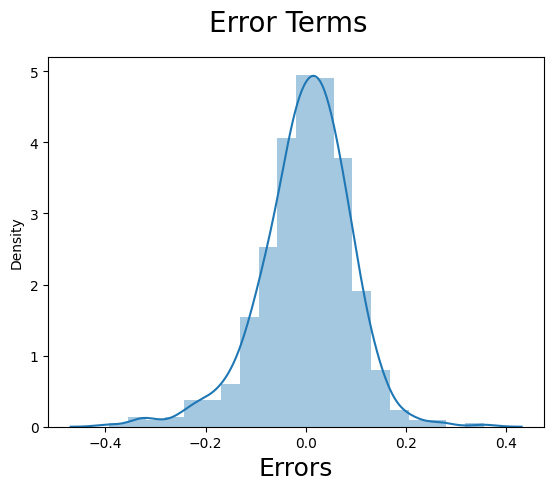

In [433]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

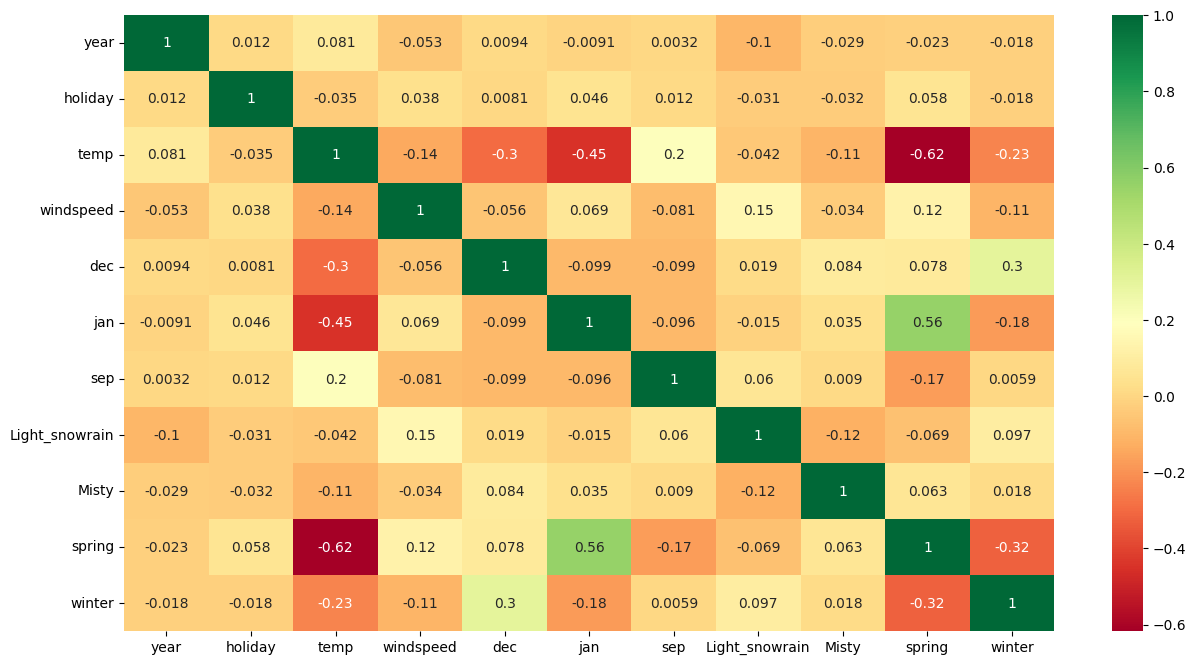

In [434]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

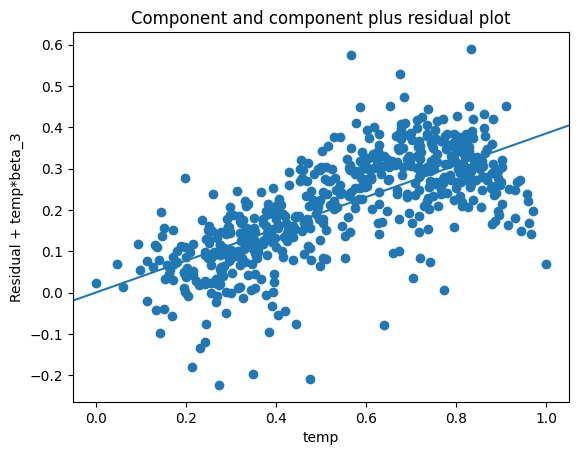

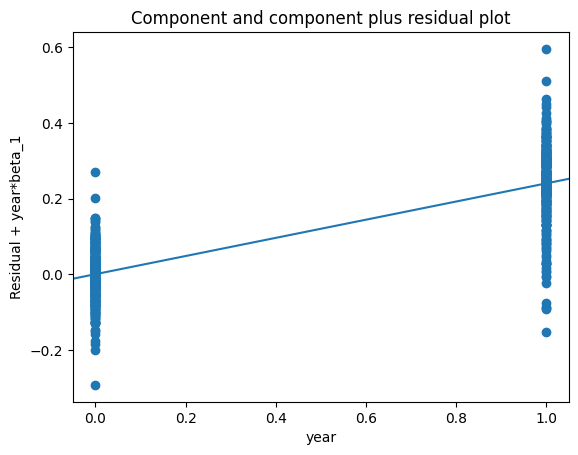

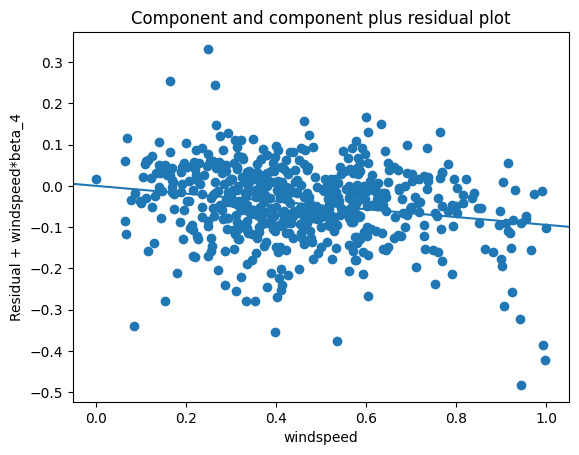

In [436]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr, 'year')
plt.show()

sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

# Homoscedasticity

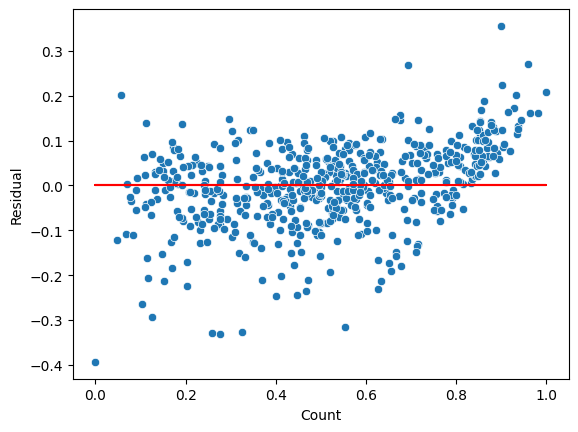

In [438]:
y_train_pred = lr.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

# Independence of residuals
## Durbin-Watson value of final model lr is 2.089, which signifies there is no autocorrelation.

In [439]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
583     1        0           1  0.843205  0.827713  0.608083   0.265707   
493     1        0           1  0.642799  0.634223  0.667483   0.545436   
294     0        0           0  0.452776  0.463565  0.498469   0.197559   
157     0        0           1  0.807900  0.771951  0.452542   0.465023   
670     1        0           1  0.368668  0.370630  0.341089   0.685331   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
583  0.834215    1    0  ...    0    0    0    1    0               0      1   
493  0.540152    0    0  ...    0    0    0    0    1               0      1   
294  0.493097    0    0  ...    1    0    0    0    0               0      0   
157  0.553497    0    0  ...    0    0    0    1    0               0      0   
670  0.670156    0    0  ...    0    0    0    0    0               0      0   

     spring  summer  winter  
583       0       0       0  
493       0       1       0  
294       0       0       1  
157       0       1       0  
670       0       0       1  

[5 rows x 30 columns]

In [440]:
y_test = df_test.pop('cnt')
X_test = df_test

In [441]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [443]:
y_pred = lr.predict(X_test_lm_6)

In [445]:
from sklearn.metrics import r2_score

In [446]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7562

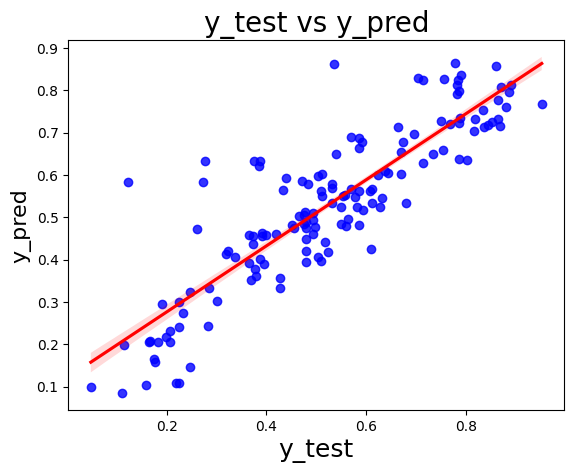

In [447]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [448]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7359


# Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.7562 
- Train dataset Adjusted R^2 : 0.836  
- Test dataset Adjusted R^2  : 0.7359


## Demand of bikes depend on year ,holiday ,temp ,windspeed ,dec ,jan  ,sep ,Light_snowrain ,Misty ,spring and winter  